In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor  # Import Random Forest Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_log_error
import warnings

warnings.filterwarnings('ignore')

# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('/content/drive/MyDrive/Final/BID_Stock_Data.csv', header=0, parse_dates=[0], index_col=0)
df = df.dropna()  # Drop missing values

# In ra 5 dòng đầu tiên của DataFrame
print(df.head())
df = df.dropna()  # Drop missing values
df = df.reset_index(drop=True)  # Reset the index


                    Open          High           Low         Close  \
Date                                                                 
2014-01-27  13193.956055  13264.512695  12770.621094  12982.289063   
2014-02-06  12841.176758  12911.732422  12417.841797  12417.841797   
2014-02-07  12276.729492  12347.285156  11641.726563  11712.282227   
2014-02-10  11641.726563  12135.618164  11430.058594  11994.505859   
2014-02-11  12135.618164  12135.618164  11923.950195  11923.950195   

               Adj Close     Volume  
Date                                 
2014-01-27  12982.289063  4593392.0  
2014-02-06  12417.841797  1360040.0  
2014-02-07  11712.282227  4234371.0  
2014-02-10  11994.505859  5771436.0  
2014-02-11  11923.950195  2747437.0  


In [3]:
# 2. chia train test validate theo tỉ lệ 8:2
# Split the data into training, testing
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))

X2D = df[['High']]  # Biến độc lập theo mảng 2 chiều
Y2D = df[['Close']]  # Biến phụ thuộc theo mảng 2 chiều

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
y_train = Y2D[:train_size]
x_train = X2D[:train_size]
y_test = Y2D[train_size:]
x_test = X2D[train_size:]
y_train_index = y_train.index  # lấy ra index trước khi đổi nó về mảng 2 chiều ( phục vụ plot )
y_train = Y2D[:train_size].values.ravel()

# Tạo mô hình Random Forest
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Ví dụ các giá trị cho số cây trong rừng
    'max_depth': [None, 10, 20, 30],  # Ví dụ các giá trị cho độ sâu tối đa của mỗi cây
    'min_samples_split': [2, 5, 10],  # Ví dụ các giá trị cho số lượng mẫu tối thiểu để chia một nút
    'min_samples_leaf': [1, 2, 4]  # Ví dụ các giá trị cho số lượng mẫu tối thiểu ở lá
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình sử dụng grid search
rf_model = grid_search.fit(x_train, y_train)

# In ra kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}
Best score: 236548.2211070024


In [6]:
# dự đoán test
y_pred = rf_model.predict(x_test)
y_pred

array([30726.96880134, 30778.27154952, 30778.27154952, 31131.11004234,
       31540.37663113, 33236.83431003, 33220.00190969, 33253.80951751,
       33854.02958847, 34497.50131629, 34926.41403005, 34754.26555445,
       36525.38764968, 38257.18183612, 38257.18183612, 38257.18183612,
       38257.18183612, 38257.18183612, 38257.18183612, 38257.18183612,
       38257.18183612, 38257.18183612, 38257.18183612, 38257.18183612,
       38257.18183612, 38257.18183612, 38257.18183612, 38257.18183612,
       38257.18183612, 38257.18183612, 38257.18183612, 38257.18183612,
       38257.18183612, 38257.18183612, 38257.18183612, 38257.18183612,
       38257.18183612, 38257.18183612, 38257.18183612, 38257.18183612,
       38257.18183612, 38257.18183612, 38257.18183612, 37707.19817746,
       37997.88847683, 37011.63492201, 36525.38764968, 36435.07585283,
       36533.85432939, 36435.07585283, 36525.38764968, 36525.38764968,
       36525.38764968, 38257.18183612, 38257.18183612, 38257.18183612,
      

In [7]:
last_row = df.tail(1)
last_data = last_row['Close'].values.reshape(-1, 1)
last_data

array([[41600.]])

In [8]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_days = []
# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = rf_model.predict(last_data)
    x_next_30_days.append(x_pred_next)
    last_data = x_pred_next.reshape(-1, 1)
x_next_30_days

[array([38257.18183612]),
 array([37696.02682327]),
 array([36525.38764968]),
 array([35900.04592378]),
 array([35091.92708344]),
 array([34754.26555445]),
 array([34241.10559856]),
 array([32773.19394053]),
 array([32179.45763914]),
 array([31522.95558044]),
 array([31131.11004234]),
 array([30679.22184357]),
 array([30065.96877238]),
 array([29896.84439865]),
 array([29509.59228225]),
 array([29241.96327]),
 array([29051.74887003]),
 array([28708.72517261]),
 array([28310.90370141]),
 array([27901.74637228]),
 array([27805.73341805]),
 array([27637.62652721]),
 array([27389.51305997]),
 array([27188.68341356]),
 array([26490.47092246]),
 array([26124.1683332]),
 array([25739.50441087]),
 array([25273.24690107]),
 array([25018.10308355]),
 array([24685.4182162])]

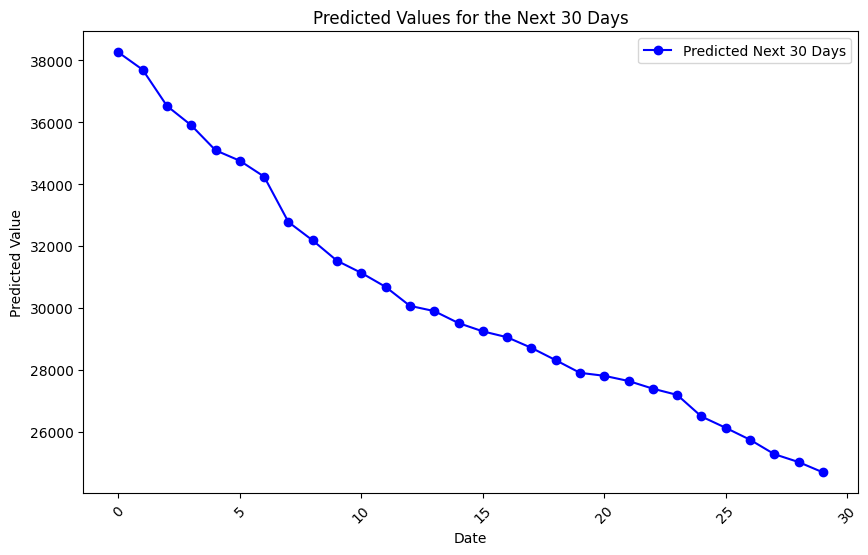

In [9]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(x_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [10]:
# Chuyển cột predict price thành mảng 2 chiều
y_pred = y_pred.reshape(-1, 1)

In [11]:
# 7. Đánh giá độ chính xác test bằng RMSE, MSLE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Testing MAPE:', test_mape)
# MSLE
test_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', test_msle)

Testing RMSE: Close    1668.404456
dtype: float64
Testing MAPE: 0.029637746630810008
Testing MSLE: 0.0018030796282578472


In [12]:
# Tạo index cho 30 ngày tiếp theo
last_index = df.index[-1]
next_30_dates = pd.RangeIndex(start=last_index, stop=last_index + 30, step=1)

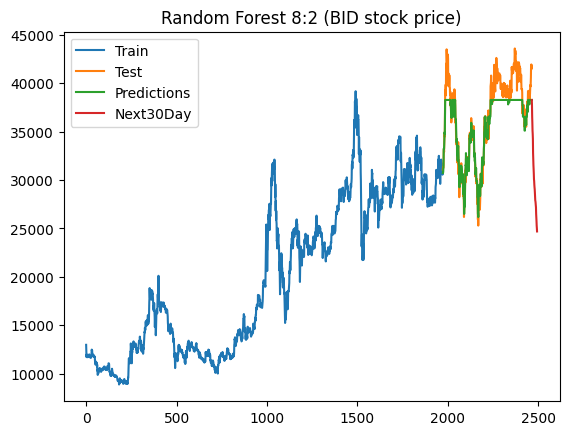

In [13]:
# 9.Vẽ hình
plt.plot(y_train_index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.plot(next_30_dates, x_next_30_days)
plt.legend(['Train', 'Test', 'Predictions', 'Next30Day'])
plt.title('Random Forest 8:2 (BID stock price)')
plt.show()